In [1]:
#Divan du Toit
#2017168192
#CSIA6813
#Assignment 3

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam


sns.set(style='white', context='notebook', palette='Pastel2')

In [2]:
#import datasets
train = pd.read_csv("training_data.csv")
test = pd.read_csv("testing_data.csv")

In [3]:
Y_train = train["label"]
#drop label from original training set
X_train = train.drop(labels = ["label"],axis = 1)

#Inspect the dataset regarding its columns, shape and content.
X_train.columns
X_train.shape
X_train.describe

<bound method NDFrame.describe of        pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995       0       0       0       0       0       0       0       0       0   
41996       0       0       0       0       0       0       0       0       0   
41997       0       0       0       0       0       0       0       0       0   
41998       0       0       0       0       0       0       0       0       0   
41999       0       0       0       0       0       0       0       0      

D:\Coding\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

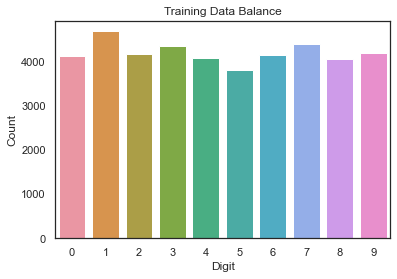

In [4]:
#create graph to inspect dataset balance
traingraph = sns.countplot(Y_train)
traingraph = traingraph.set(xlabel='Digit',ylabel='Count')
plt.title('Training Data Balance')
Y_train.value_counts()
#From graph we can conclude that data is not unbalanced

In [5]:
#Check for null values in training set
X_train.isnull().any().describe()

#No null values

count       784
unique        1
top       False
freq        784
dtype: object

In [6]:
#Check for null values in test set
test.isnull().any().describe()

#No null values

count       784
unique        1
top       False
freq        784
dtype: object

In [7]:
#Normalization
#Will perform to convert illumination from [0...255] to [0...1]
#Will make CNN converge faster
X_train = X_train / 255.0
test = test / 255.0

In [8]:
#Reshape image to 28x28x1
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [9]:
#Label encoding
Y_train = to_categorical(Y_train, num_classes = 10)

In [10]:
#split training and validation set

#set random seed for consistency
random_seed = 2

#split 0.1/0,9
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

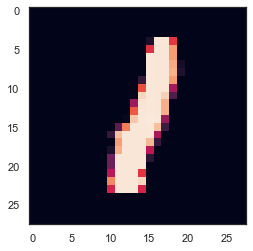

In [11]:
#inspect example
g = plt.imshow(X_train[20][:,:,0])

In [12]:
#Create CNN
#my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out
model = Sequential()

#first add 2 Convolution layers with relu activation
model.add(Conv2D(filters = 32, kernel_size= (5,5),
                 padding ='Same', activation = 'relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(filters = 32, kernel_size= (5,5),
                 padding ='Same', activation = 'relu'))
#Then add MaxPool2D layer 
model.add(MaxPool2D(pool_size=(2,2)))
#Add dropout layer to improve generalization and reduce overfitting
model.add(Dropout(0.25))

#Duplicate above but for new dimenstions
model.add(Conv2D(filters = 64, kernel_size= (3,3),
                 padding ='Same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size= (3,3),
                 padding ='Same', activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2), strides = (2,2)))
model.add(Dropout(0.25))

#flatten to use fully connected layers
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
#Softmax outputs distribution of each digit
model.add(Dense(10, activation = "softmax"))


In [13]:
#Create Optimizer 
#Will use adam instead of normal SGD
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [14]:
#Compile model
model.compile(optimizer = optimizer,
              loss = "categorical_crossentropy",
              metrics=["accuracy"])


In [15]:
#set parameters for testing
epochs = 10
batch_size = 250

In [16]:
#model fitting
hist = model.fit(X_train,Y_train,batch_size,epochs,
          verbose=1,validation_data=(X_val,Y_val),
          steps_per_epoch=X_train.shape[0]//batch_size)

Epoch 1/10
151/151 [==============================] - 91s 602ms/step - loss: 0.3666 - accuracy: 0.8792 - val_loss: 0.0779 - val_accuracy: 0.9738
Epoch 2/10
151/151 [==============================] - 96s 634ms/step - loss: 0.0934 - accuracy: 0.9720 - val_loss: 0.0534 - val_accuracy: 0.9824
Epoch 3/10
151/151 [==============================] - 91s 599ms/step - loss: 0.0700 - accuracy: 0.9782 - val_loss: 0.0391 - val_accuracy: 0.9888
Epoch 4/10
151/151 [==============================] - 93s 614ms/step - loss: 0.0538 - accuracy: 0.9843 - val_loss: 0.0357 - val_accuracy: 0.9883
Epoch 5/10
151/151 [==============================] - 96s 637ms/step - loss: 0.0489 - accuracy: 0.9859 - val_loss: 0.0326 - val_accuracy: 0.9910
Epoch 6/10
151/151 [==============================] - 92s 613ms/step - loss: 0.0414 - accuracy: 0.9870 - val_loss: 0.0358 - val_accuracy: 0.9910
Epoch 7/10
151/151 [==============================] - 90s 594ms/step - loss: 0.0341 - accuracy: 0.9894 - val_loss: 0.0331 - val_ac

In [17]:
#Print final loss and accuracy
final_loss, final_acc = model.evaluate(X_val, Y_val, verbose=1)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

132/132 [==============================] - 2s 13ms/step - loss: 0.0246 - accuracy: 0.9936
Final loss: 0.0246, final accuracy: 0.9936


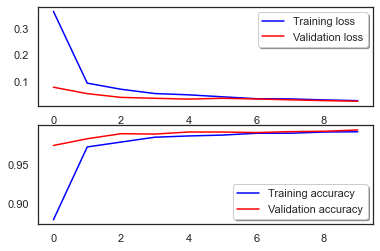

In [18]:
#plot loss and accuracy curves
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['loss'], color='b', label="Training loss")
ax[0].plot(hist.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [19]:
#show confusion matrix
Y_hat = model.predict(X_val)
Y_pred = np.argmax(Y_hat, axis=1)
Y_true = np.argmax(Y_val, axis=1)
cm = confusion_matrix(Y_true, Y_pred)
print(cm)

[[411   0   0   0   0   0   0   0   0   0]
 [  0 483   0   1   0   0   0   0   1   0]
 [  0   0 401   1   0   0   0   0   0   1]
 [  0   0   0 415   0   0   0   0   3   0]
 [  0   0   1   0 458   0   1   0   0   1]
 [  0   0   0   1   0 369   1   0   1   0]
 [  3   1   0   0   0   0 408   0   1   0]
 [  0   0   2   0   0   0   0 444   0   0]
 [  0   0   0   0   0   0   0   0 381   1]
 [  1   0   0   0   2   0   0   3   0 403]]
